# Solution 2

## FINM 37500 - 2023

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

# 1. Stripping Caps

The file `data/cap_curves_2023-03-31.xlsx` has market data on the following curves:
* swap rates (SOFR)
* discount factors
* forward rates 
* flat volatilites

A few details
* the swap and forward rates are quarterly compounded.
* the flat volatilites are (Black) quotes on caps containing caplets ranging from expiration of $\tau=.5$ to $\tau=T$.
* the details of the data prep can be found in `build_data/Process Cap Quotes`.

## Context

Recall that 
* a cap is made of caplets with $.5\le \tau \le T$
* the flat volatility at $T$ is input for every caplet corresponding to the cap of $T$.
* use Black's formula for this calculation.
* in Black's formula, use $T-.25$ as the rate for the caplet is determined one period before it is paid.

As for the cap parameters,
* the cap's strike is the swap rate with the same tenor. So the $T=2$ cap is struck at the swap rate of $\tau=2$.
* the notional of the cap is $100.
* the payoff of each caplet is

$$\frac{100}{n}\max(r-K,0)$$

where $n$ is the frequency; here $n=4$.

Thus, the corresponding value in Black's fomula for a caplet is
$$P^{\text{cap}}_{T} = \frac{100}{n} \sum_{\tau=.5}^T B_{\text{call}}(\overline{\sigma}_T, \tau-.25, K=s_T, f_{\tau}, Z_{\tau})$$
Note here that for every caplet in cap $T$, we plug in the same 
* flat vol with tenor $T$.
* strike which is the swap rate of maturity $T$.

The notation above is using subscripts for tenor / maturity rather than time period. That is, $Z_{\tau}$ denotes $Z(t, t+\tau)$ which is today's discount factor for maturity $\tau$. Similarly for the swap rate of tenor $T$, denoted above $s_T$ and forward rate $f(t,t+\tau-.25, t+\tau)$ denoted simply $f_{\tau}$.

### Black's Formula
Recall Black's formula:

$$\begin{align}
B_{\text{call}}(\sigma, T, K, f, Z) = &\; Z\left[f\mathcal{N}\left(d_1\right) - K\mathcal{N}(d_2)\right] \\
d_1 =& \frac{\ln\left(\frac{f}{K}\right) + \frac{\sigma^2}{2}T}{\sigma\sqrt{T}} \\
d_2 =& d_1 -\sigma\sqrt{T}
\end{align}
$$

## 1.1 Cap Prices

For each cap maturity, $.5\le T \le 10$, use the flat volatility to get the price of the cap.

Report the cap prices across expirations, $.5\le T \le 10$.

Plot the cap prices across expirations.

## 1.2 Caplet Prices and Forward Volatilities

Using the cap prices, strip out the
* caplet prices
* forward volatility at $\tau$ which properly prices caplet $\tau$ using Black's formula.

List and plot the forward volatility versus the flat volatiltiy.

# **<span style="color:red">Solution 1</span>**

In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.insert(0, '../cmds')
from ficcvol import *
from binomial import *
from ratecurves import *

In [2]:
import datetime
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

## Stripping Caps

In [3]:
DATE = '2023-03-31'
curves = pd.read_excel(f'../data/cap_curves_{DATE}.xlsx', sheet_name=f'rate curves {DATE}').set_index('tenor')

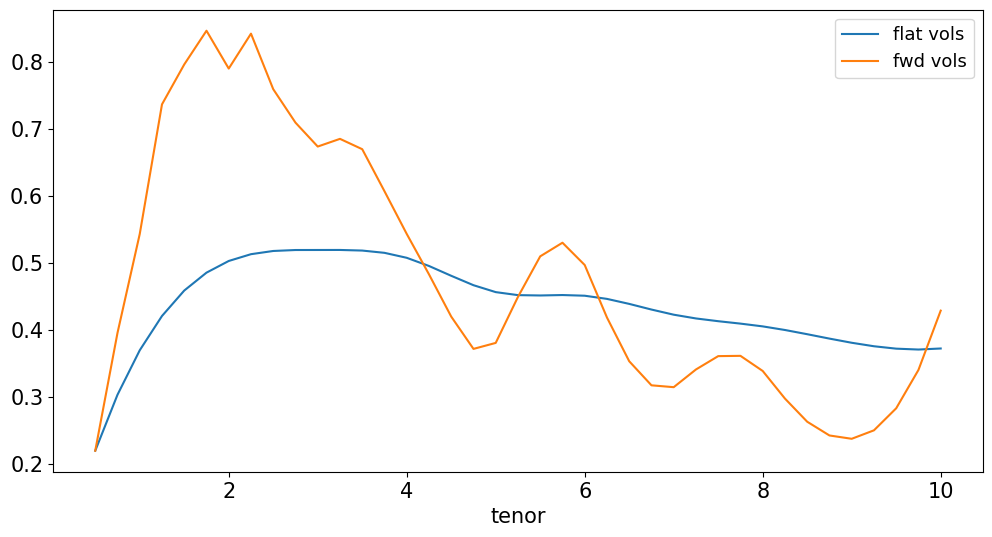

In [4]:
capcurves = flat_to_forward_vol(curves)

capcurves[['flat vols','fwd vols']].plot();

In [5]:
capcurves

,flat vols,caplet prices,fwd vols,cap prices
tenor,,,,
0.25,NaN,NaN,NaN,NaN
0.50,0.219491,0.051758,0.219491,0.051758
0.75,0.303075,0.109222,0.395405,0.160980
1.00,0.369483,0.163527,0.543084,0.324507
1.25,0.420688,0.198868,0.736688,0.523376
1.50,0.458664,0.223077,0.796268,0.746453
1.75,0.485385,0.234474,0.846632,0.980927
2.00,0.502824,0.241250,0.790121,1.222176
2.25,0.512955,0.235396,0.842264,1.457572


# 2. Pricing a Callable Bond with BDT

## 2.1 Calibrate a BDT model 

Use data from the file `data/cap_curves_2023-03-31.xlsx` to calibrate the model.
* Use the forward volatilities calculated in 1.2 to calibrate $\sigma$ at each step. 
    * If you could not solve 1.2, then use $\sigma=.35$ at every step.
    * You do not have a forward volatility at $\tau=.25$ given there is no caplet there. For purposes of the BDT model, assume $\sigma_{.25}$ is equal to the forward volatility at the first estimated period, $t=0.50$. That is, use the first estimated forward vol (corresponding to $\tau=.50$ for both $t=.25$ and $t=.50$ in the BDT tree.
    
* Given these $\sigma$ parameters, calibrate the series of $\theta$ to fit the zero-coupon bond prices given by `discounts` (multiplied by 100).

Display the series of $\theta$ parameters.

Display the tree of rates from $0\le t \le 10$.

## 2.2 Price the Freddie Mac Bond

The U.S. has many forms of *agency* debt in addition to *Treasury* debt. The largest of these *agency* issuers are the housing entities commonly referred to as Freddie Mac and Fannie Mae. While technically distinct from the U.S. Treasury, they are widely seen as having the full credit and backing of the Treasury--particularly after the bailouts of 2008.

Thus, we will examine this agency debt as (credit) risk-free, just like Treasury debt.

Consider the Freddie Mac bond with Bloomberg ID `BX8543742`.
* Issued 2022-07-26
* Matures 2030-07-26
* Semiannual coupons
* Coupon rate 4.375%
* Issued 25mm.

Price this bond using the model calibrated from 2023-03-31 data.
* We will model this bond as maturing 2030-06-30 (a few weeks early) so that it has maturity of 7.25 years, modeled at quarterly intervals.
* Note that the coupons are paid in the final period and every other quarter prior (semiannually.) Thus, it pays a coupon in after just one quarter from the current time.

The market quote as of 2023-03-31 is \$97.478.

Use the BDT model to price the bond. How close is it to the market quote?

## 2.3 Callable Bond

One important difference between Treasury debt and this bond is that this bond is **callable**
* Furthermore, this bond is callable with **American** style--it can be called any quarter.
* Strike is 100.
* Note that the holder of the bond is short this call option; (the issuer has the optionality.) 

**Use the BDT model to price this implicit American call option and the resulting callable bond.**
* Note that the price of the callable bond is your answer to the previous question minus this American option.
* How close is the modeled price to the market quoted price now? 

#### Caution on coupons
* Be careful in modeling the underlying for the American option.
* In pricing the bond in the previous problem, you should have considered the coupon values.
* But in pricing the option, you must account for the fact that the price drops by the coupon value at the node the coupon is paid. (That is, the tree shows the *ex-coupon* price.)
* Consider building the bond valuation tree for the problem above which incorporates the coupons, similar to the cashflow trees we used in W.2. for caps and swaps.
* But then adjust this bond value tree by subtracting the current period's coupons in order to build the underlying tree.

## 2.4 Exercising the Option

Show a heatmap of the nodes in which the American bond is exercised.

Is it exercised any time it is in-the-money? What stands out about this relationship?

***

# **<span style="color:red">Solution 2</span>**

### Calibrating Theta

In [6]:
quotes = curves['discounts']*100

In [7]:
sigmas = capcurves['fwd vols']
sigmas.iloc[0] = sigmas.iloc[1]

theta, ratetree = estimate_theta(sigmas,quotes)
format_bintree(theta.to_frame().T, style='{:.2%}')

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00,5.25,5.50,5.75,6.00,6.25,6.50,6.75,7.00,7.25,7.50,7.75,8.00,8.25,8.50,8.75,9.00,9.25,9.50,9.75
theta,,-3.22%,-43.70%,-68.97%,-132.56%,-104.57%,-111.54%,-58.36%,-107.94%,-31.37%,-23.63%,-10.71%,-27.54%,-11.17%,23.31%,27.80%,26.38%,59.49%,94.94%,84.42%,53.56%,38.85%,36.44%,45.07%,62.12%,72.69%,75.94%,72.08%,62.44%,55.84%,53.67%,56.09%,61.81%,64.60%,63.91%,59.88%,52.30%,40.86%,24.94%,3.25%


### Rate Tree

In [8]:
format_bintree(ratetree,style='{:.2%}')

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00,5.25,5.50,5.75,6.00,6.25,6.50,6.75,7.00,7.25,7.50,7.75,8.00,8.25,8.50,8.75,9.00,9.25,9.50,9.75
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.88%,5.41%,5.91%,6.52%,6.77%,7.76%,8.97%,11.50%,13.38%,18.09%,24.31%,33.15%,43.58%,59.24%,85.06%,119.64%,162.69%,232.87%,355.52%,531.06%,760.04%,1080.72%,1543.04%,2214.01%,3187.71%,4561.08%,6462.29%,9055.49%,12551.82%,17285.09%,23679.42%,32269.82%,43698.68%,58569.63%,77565.78%,101440.44%,130999.33%,167130.68%,210856.06%,263389.17%
1,,4.34%,4.74%,5.24%,5.44%,6.23%,7.20%,9.24%,10.75%,14.52%,19.52%,26.61%,34.99%,47.57%,68.30%,96.06%,130.63%,186.97%,285.46%,426.40%,610.26%,867.74%,1238.95%,1777.69%,2559.50%,3662.21%,5188.75%,7270.90%,10078.20%,13878.67%,19012.85%,25910.32%,35086.86%,47027.16%,62279.68%,81449.30%,105182.93%,134193.78%,169302.08%,211482.35%
2,,,3.19%,3.53%,3.66%,4.20%,4.85%,6.22%,7.24%,9.78%,13.14%,17.92%,23.56%,32.03%,45.99%,64.69%,87.97%,125.91%,192.23%,287.14%,410.95%,584.34%,834.31%,1197.11%,1723.58%,2466.16%,3494.14%,4896.27%,6786.73%,9345.99%,12803.39%,17448.19%,23627.75%,31668.42%,41939.58%,54848.54%,70830.94%,90367.05%,114009.23%,142413.73%
3,,,,2.05%,2.13%,2.44%,2.82%,3.61%,4.20%,5.68%,7.64%,10.41%,13.69%,18.61%,26.72%,37.58%,51.10%,73.15%,111.68%,166.82%,238.74%,339.47%,484.70%,695.46%,1001.32%,1432.73%,2029.94%,2844.51%,3942.78%,5429.59%,7438.18%,10136.60%,13726.63%,18397.89%,24364.96%,31864.48%,41149.51%,52499.09%,66234.11%,82735.81%
4,,,,,1.02%,1.17%,1.35%,1.73%,2.01%,2.72%,3.66%,4.98%,6.55%,8.91%,12.79%,17.99%,24.46%,35.02%,53.46%,79.85%,114.29%,162.51%,232.02%,332.92%,479.33%,685.84%,971.72%,1361.66%,1887.39%,2599.13%,3560.63%,4852.36%,6570.89%,8807.01%,11663.43%,15253.42%,19698.14%,25131.14%,31706.05%,39605.36%
5,,,,,,0.53%,0.61%,0.78%,0.91%,1.23%,1.65%,2.25%,2.96%,4.02%,5.77%,8.11%,11.03%,15.79%,24.11%,36.02%,51.54%,73.29%,104.64%,150.15%,216.18%,309.32%,438.26%,614.12%,851.23%,1172.23%,1605.88%,2188.46%,2963.53%,3972.04%,5260.31%,6879.43%,8884.04%,11334.37%,14299.71%,17862.37%
6,,,,,,,0.26%,0.33%,0.39%,0.53%,0.71%,0.96%,1.27%,1.72%,2.47%,3.48%,4.73%,6.77%,10.34%,15.45%,22.11%,31.43%,44.88%,64.39%,92.71%,132.65%,187.95%,263.37%,365.06%,502.72%,688.69%,938.53%,1270.93%,1703.44%,2255.92%,2950.29%,3809.98%,4860.82%,6132.53%,7660.40%
7,,,,,,,,0.15%,0.18%,0.24%,0.32%,0.44%,0.58%,0.78%,1.12%,1.58%,2.15%,3.07%,4.69%,7.01%,10.03%,14.26%,20.37%,29.22%,42.07%,60.20%,85.29%,119.51%,165.66%,228.13%,312.52%,425.90%,576.74%,773.00%,1023.71%,1338.81%,1728.93%,2205.79%,2782.88%,3476.21%
8,,,,,,,,,0.08%,0.10%,0.14%,0.19%,0.25%,0.34%,0.48%,0.68%,0.92%,1.32%,2.02%,3.02%,4.32%,6.14%,8.77%,12.59%,18.12%,25.93%,36.74%,51.48%,71.35%,98.26%,134.61%,183.45%,248.42%,332.96%,440.95%,576.67%,744.71%,950.11%,1198.68%,1497.32%


### Parameters of the Bond

In [9]:
FACE = 100
T=7.25
compound = 4
cpn = .04375
cpn_freq = 2

STRIKE = 100
CLEANCALL = True

dt = 1/compound
tsteps = int(T/dt)

In [10]:
wrapper_bond = lambda r: payoff_bond(r, dt, facevalue=FACE * (1+cpn/cpn_freq))
payoff_call = lambda p: np.maximum(p-STRIKE,0)

### Use the coupons to build a cashflow tree

### Use the rates and the coupons to build the bond value tree

In [11]:
cftree = construct_bond_cftree(T, compound, cpn)
bondtree = bintree_pricing(payoff=wrapper_bond, ratetree=ratetree.iloc[:tsteps,:tsteps], cftree=cftree)
format_bintree(bondtree)

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00,5.25,5.50,5.75,6.00,6.25,6.50,6.75,7.00
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,107.98,103.76,96.63,90.83,82.00,74.41,63.98,55.26,44.36,35.83,26.00,19.49,12.32,8.72,4.51,3.47,1.37,1.51,0.30,0.60,0.03,0.15,0.00,0.01,0.00,0.00,0.00,0.00,0.00
1,,114.85,109.35,105.31,98.27,92.39,83.38,75.61,65.00,55.90,44.59,35.76,25.64,18.76,11.35,7.68,3.63,2.61,0.73,0.86,0.09,0.25,0.00,0.03,0.00,0.00,0.00,0.00,0.00
2,,,118.48,116.00,110.74,106.84,99.92,94.19,85.38,77.64,66.97,57.88,46.43,37.20,26.54,19.24,11.54,7.45,3.21,2.13,0.53,0.59,0.04,0.11,0.00,0.00,0.00,0.00,0.00
3,,,,122.85,118.94,116.68,111.65,108.08,101.57,96.23,87.78,80.54,70.26,61.30,49.70,40.29,29.33,21.30,12.82,8.25,3.82,2.38,0.65,0.52,0.04,0.06,0.00,0.00,0.01
4,,,,,123.65,122.46,118.76,116.80,112.18,109.06,103.06,98.41,90.69,84.11,74.37,65.97,54.82,45.35,33.96,25.64,16.84,11.51,6.11,3.82,1.46,0.95,0.29,0.29,0.91
5,,,,,,125.47,122.51,121.51,118.06,116.42,112.18,109.59,104.22,100.26,93.28,87.59,78.82,71.21,60.67,51.99,41.40,33.30,24.08,18.02,11.73,8.69,5.92,6.20,12.17
6,,,,,,,124.37,123.88,121.06,120.24,117.01,115.69,111.83,109.72,104.90,101.67,95.58,90.84,83.10,76.88,68.01,60.89,51.54,44.54,36.35,31.58,27.38,29.23,41.02
7,,,,,,,,125.03,122.53,122.12,119.41,118.75,115.72,114.65,111.11,109.43,105.17,102.59,97.30,93.68,87.43,82.87,75.81,70.77,63.91,60.08,56.24,58.37,67.54
8,,,,,,,,,123.25,123.05,120.60,120.27,117.66,117.13,114.26,113.42,110.18,108.87,105.09,103.21,98.87,96.42,91.57,88.78,83.98,81.92,79.05,80.83,85.49


### Clean Prices

We want to compare the (clean) strike to the **clean** bond price. Thus, we need to subtract accrued interest and coupons from the bond value tree.

$$P_{\text{clean}} = P_{\text{dirty}} - C_{\text{accrued int or coupon}}$$

Then, we will use this clean bond price tree as the underlying.

In [12]:
accint = construct_accint(bondtree.columns.values, compound, cpn)
cleantree = np.maximum(bondtree.subtract(accint,axis=1),0)

format_bintree(cleantree)

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00,5.25,5.50,5.75,6.00,6.25,6.50,6.75,7.00
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,106.88,101.58,95.54,88.64,80.91,72.23,62.89,53.07,43.26,33.64,24.90,17.30,11.23,6.54,3.42,1.29,0.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,,112.66,108.26,103.12,97.18,90.20,82.29,73.42,63.91,53.72,43.50,33.58,24.54,16.57,10.26,5.50,2.53,0.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,,,117.38,113.81,109.65,104.66,98.82,92.00,84.28,75.46,65.88,55.70,45.34,35.02,25.44,17.06,10.44,5.26,2.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,,,,120.66,117.84,114.49,110.56,105.89,100.48,94.04,86.69,78.35,69.17,59.11,48.61,38.11,28.24,19.11,11.72,6.06,2.73,0.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,,,,,122.56,120.28,117.66,114.61,111.08,106.87,101.96,96.22,89.60,81.93,73.27,63.79,53.73,43.17,32.87,23.45,15.74,9.33,5.02,1.63,0.36,0.00,0.00,0.00,0.00
5,,,,,,123.28,121.42,119.33,116.97,114.24,111.08,107.41,103.13,98.08,92.18,85.40,77.72,69.02,59.57,49.81,40.30,31.11,22.98,15.83,10.64,6.51,4.83,4.01,11.07
6,,,,,,,123.28,121.69,119.97,118.05,115.92,113.50,110.74,107.53,103.81,99.48,94.48,88.65,82.01,74.69,66.92,58.70,50.44,42.35,35.25,29.39,26.29,27.04,39.93
7,,,,,,,,122.84,121.44,119.93,118.32,116.56,114.63,112.46,110.02,107.24,104.07,100.40,96.20,91.49,86.33,80.68,74.72,68.58,62.82,57.89,55.14,56.19,66.44
8,,,,,,,,,122.16,120.86,119.51,118.08,116.57,114.94,113.17,111.23,109.09,106.69,104.00,101.02,97.78,94.24,90.48,86.59,82.89,79.73,77.96,78.65,84.40


### Value the American Call options

In [13]:
if CLEANCALL:
    undertree = cleantree
else:
    undertree = bondtree
    
calltree = bintree_pricing(payoff=payoff_call, ratetree=ratetree.iloc[:tsteps,:tsteps], undertree= undertree, style='american')
format_bintree(calltree)

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00,5.25,5.50,5.75,6.00,6.25,6.50,6.75,7.00
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,11.72,9.26,7.02,5.11,3.54,2.33,1.43,0.82,0.43,0.21,0.09,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,,14.47,11.74,9.14,6.85,4.88,3.31,2.11,1.26,0.69,0.34,0.15,0.06,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,,,17.50,14.63,11.67,9.01,6.61,4.63,3.06,1.89,1.09,0.57,0.27,0.11,0.04,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,,,,20.66,17.84,14.54,11.60,8.75,6.35,4.34,2.79,1.68,0.92,0.46,0.20,0.07,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,,,,,22.56,20.28,17.66,14.61,11.31,8.49,6.01,4.01,2.53,1.45,0.76,0.35,0.14,0.04,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,,,,,,23.28,21.42,19.33,16.97,14.24,11.08,8.12,5.59,3.68,2.21,1.21,0.60,0.25,0.09,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,,,,,,,23.28,21.69,19.97,18.05,15.92,13.50,10.74,7.59,5.23,3.27,1.88,0.98,0.44,0.16,0.05,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,,,,,,,,22.84,21.44,19.93,18.32,16.56,14.63,12.46,10.02,7.24,4.73,2.81,1.56,0.74,0.29,0.09,0.02,0.00,0.00,0.00,0.00,0.00,0.00
8,,,,,,,,,22.16,20.86,19.51,18.08,16.57,14.94,13.17,11.23,9.09,6.69,4.11,2.41,1.22,0.51,0.17,0.04,0.00,0.00,0.00,0.00,0.00


### Price vs Market Price

In [14]:
QUOTE_CALLABLE_CLEAN = 97.478
num_accrued = int((T*compound) %cpn_freq)
quote_callable_dirty = QUOTE_CALLABLE_CLEAN + num_accrued * (cpn/compound)*FACE

callablebondtree = bondtree - calltree
model_price_dirty = callablebondtree.iloc[0,0]
model_price_clean = model_price_dirty - accint.iloc[0]

prices = pd.DataFrame({'clean':[QUOTE_CALLABLE_CLEAN, model_price_clean], 'dirty':[quote_callable_dirty, model_price_dirty]}, index=['market quote','model'])
prices.style.format('{:.2f}')

,clean,dirty
market quote,97.48,98.57
model,95.17,96.26


#### Overpriced?

We find here that the callable bond is overpriced. There are a few possibilities...

Model
* Could be calibrated poorly, (to the caps, swaps, etc.)
* Could be implemented poorly, (interpolation, time grid, etc.)

The market
* It is frequently seen that callable bonds are seemingly overpriced.
* Why might this overpricing be hard to arbitrage?
* Francis Longstaff (1992) has a good discussion of this with regard to callable Treasury bonds.

### Optimal Exercise

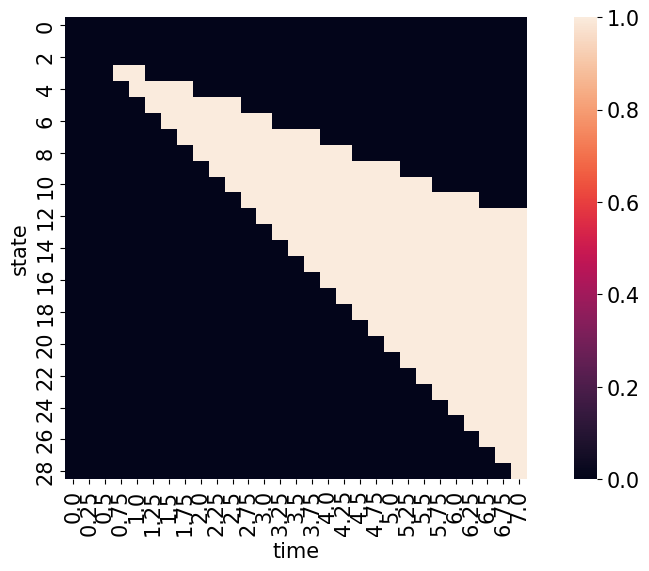

In [15]:
sns.heatmap(exercise_decisions(payoff_call,undertree,calltree),square=True);

### Nodes in the money

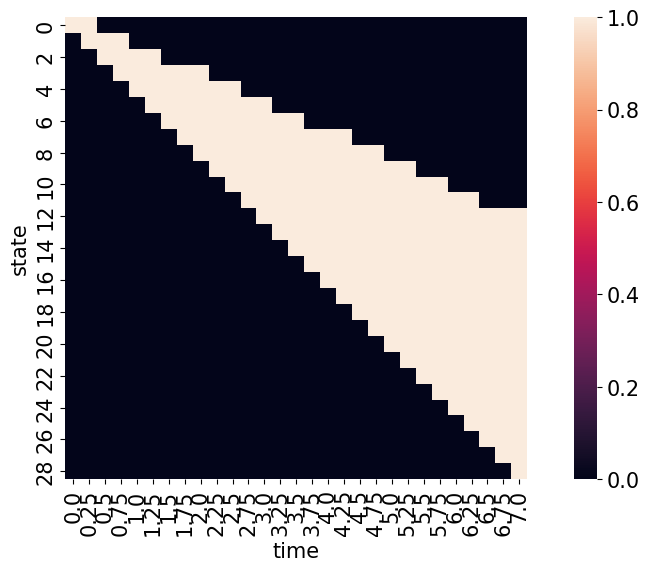

In [16]:
sns.heatmap(undertree > STRIKE, square=True);

***

# 3. Option Adjusted Spread

*This section is optional. No need to submit it, but we will likely discuss it in class.*

## 3.1 Calculate the OAS

The **option adjusted spread** is the spread one would need to add to the spot curve, (the discounts), to get the modeled price to match the market price of the derivative. That is, how many bps would you need to add or subtract to all the spot rates in order to perfectly price this callable bond? 

* Ignore the effect of the parallel shift in rates on the forward vols. (No need to recalculate section 1.) 

* Use the parallel shifts to recalibrate the $\theta$ parameters in the BDT tree. 

Report the OAS needed to add (or subtract) in a parallel shift in spot to correctly model the callable bond.

#### Note:
This **OAS** is a common way to quote whether a derivative seems to be undervalued (positive OAS) or overvalued (negative OAS.) Of course, the OAS is dependent on our modeling choices, so it could also indicate the model is bad.

## 3.2 Convexity

Continue with parallel shifts of the (present, market quoted) yield curve. 
* Plot the relationship between the value of the callable bond as the spot curve shifts higher and lower.
* Do you see convexity in this relationship?

***

## OAS

In [17]:
def wrapper_callable_price(dr):
    quotes = ratecurve_to_discountcurve(curves['swap rates'].loc[:T] + dr, n_compound=compound)*FACE
    error = quote_callable_dirty - price_callable(quotes.loc[:T], sigmas.loc[:T], cftree, accint,  wrapper_bond, payoff_call, cleanstrike=CLEANCALL)
    return error

In [18]:
oas = fsolve(wrapper_callable_price, 0)[0]
display(f'The OAS for pricing the callable bond is {oas:.2%}')

'The OAS for pricing the callable bond is -0.64%'

### Verify that OAS Prices

Shift the swap curve by the OAS spread and check that model price is same as the market quote.

In [19]:
quotes = ratecurve_to_discountcurve(curves['swap rates'].loc[:T] + oas, n_compound=compound)*FACE
prices.loc['model w/ oas','dirty'] = price_callable(quotes.loc[:T], sigmas.loc[:T], cftree, accint,  wrapper_bond, payoff_call, cleanstrike=CLEANCALL)
prices.style.format('{:.2f}')

,clean,dirty
market quote,97.48,98.57
model,95.17,96.26
model w/ oas,nan,98.57


## Get reaction curve

In [20]:
dr_inc = .0025
drvec = np.arange(-.0250,.0275,dr_inc)

In [21]:
T=7.25
tsteps = int(T/dt)

cftree = construct_bond_cftree(T,compound,cpn)
accint = construct_accint(cftree.columns.values, compound, cpn)

In [22]:
ytm = curves.loc[T,'swap rates']

modpx = pd.Series(dtype=float, index=drvec+ytm, name='callable')
for numdr, dr in enumerate(drvec):
    quotes = ratecurve_to_discountcurve(curves['swap rates'].loc[:T] + dr, n_compound=compound)*FACE
    modpx.loc[dr+ytm] = price_callable(quotes.loc[:T], sigmas.loc[:T], cftree, accint,  wrapper_bond, payoff_call,cleanstrike=CLEANCALL)

### Compare to non-callable bond

In [23]:
pxvanilla = pd.Series(dtype=float, index=(drvec+ytm),name='non-callable')
for dr in drvec:
    pxvanilla.loc[dr+ytm] = price_bond(ytm+dr, T, cpn, accr_frac=.5)

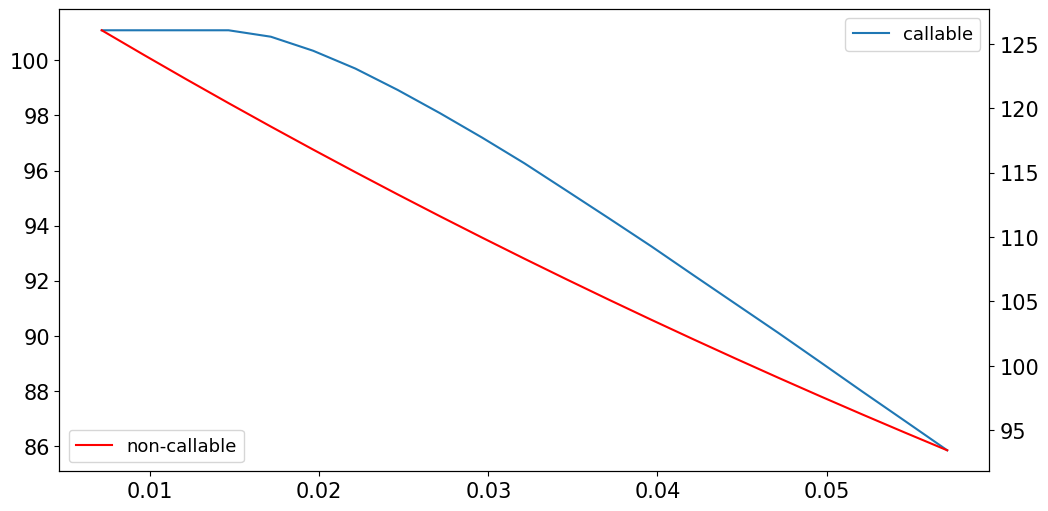

In [24]:
fig, ax1 = plt.subplots()
ax1.plot(modpx)
ax2 = ax1.twinx()
ax2.plot(pxvanilla, color='r')
ax1.legend(['callable'])
ax2.legend(['non-callable'],loc='lower left')
plt.show()

### Alternate Ways to Compute OAS

Overall, OAS is based on
* changing the discounting
* not changing the cashflows

For this bond, the cashflows are not dependent on the interest rate, but in case of other derivatives, note that the shift of the discounts should only be applied to the pricing via the discounting, not the cashflows.

#### Impact on forward vol?
Above, we varied the spot curve and considered its pricing impact via
* fitting the BDT tree via parameters $\theta$
* this was done keeping forward vol constant.

Should we shift forward vol with the spot curve?
* Maybe not. If rates shift, the cap prices should probably be shifted rather than fitting these same cap prices to the new discounts.
* But if we do want to recalibrate the forward vol, we need to decide how to treat the cap prices or flat vols. 

Here, we could also consider how the spot changes modify the forward vols.
* Assuming flat vols stay constant.
* Recomputing forward vols from flat vols with a new term structure.

Try rerunning the calculation above but using `shiftrates_fwdvols` at each iteration of the loop.